### Nome:  
### Número USP: 


# Biologia de Sistemas - 2021.2
## Exercício Programa 2 - Theshold Boolean Network - Inference Problem
Muitos dos problemas de Biologia de Sistemas consistem em análises de dados obtidos de expressões gênicas para verificar a dependência entre os genes em determinadas situações como evolução de doenças, ciclos como divisão celular, floração de plantas, fases de desenvolvimento de protozoários, diferenciação de células embrionárias, entre outras. Nem sempre a coleta de dados é realizada temporalmente, e então, o que se obtém das amostras é um estado de estabilidade de um determinado processo.

A questão que se coloca neste trabalho é, se é possível a partir de um atrator inferir a dependência entre os componentes analisados com o modelo de TBN (threshold boolean network).

Para isso, utilizaremos o resultado obtido num modelo de divisão celular de uma célula de mamíferos proposto por Fauré et al., e tentaremos chegar a algumas matrizes candidatas a representação dessas interdependências entre os componentes regulatórios selecionados pelos autores. 

Alguns módulos com códigos apresentados em aula podem ser utilizados. Abaixo está a importação deles para o Google Colaboratory. Se você preferir fazer o exercício localmente faça o download para o seu computador através dos links.
Você pode também utilizar seus proprios módulos, alterar estes que estão disponibilizados, ou ainda utilizar partes dos códigos que estão neles.

In [1]:
#this tbn is fixed
tbn_module_url = "https://drive.google.com/file/d/1zqGWKBLyWWvVyxQCN0r1UT7lC3OEULqM/view?usp=sharing"
tbn_infer_module_url = "https://drive.google.com/file/d/1VE0i4e6GzRq0tC_bHIMnHyL_Qa4WIVPq/view?usp=sharing"
tbn_neutral_graph_url = "https://drive.google.com/file/d/17NQcOYoRxmxEV4mKiNVdYPKPTF2FRiUd/view?usp=sharing"

url_list = [tbn_infer_module_url, tbn_module_url, tbn_neutral_graph_url]

for url in url_list:
  a = url.find ('/d/')
  b = url.find ('/view?usp=sharing')
  id_file = url[a+3:b]
  print (id_file)
  !gdown --id $id_file

1VE0i4e6GzRq0tC_bHIMnHyL_Qa4WIVPq
Downloading...
From: https://drive.google.com/uc?id=1VE0i4e6GzRq0tC_bHIMnHyL_Qa4WIVPq
To: /content/tbn_infer.py
100% 4.06k/4.06k [00:00<00:00, 3.37MB/s]
1zqGWKBLyWWvVyxQCN0r1UT7lC3OEULqM
Downloading...
From: https://drive.google.com/uc?id=1zqGWKBLyWWvVyxQCN0r1UT7lC3OEULqM
To: /content/tbn.py
100% 6.63k/6.63k [00:00<00:00, 14.4MB/s]
17NQcOYoRxmxEV4mKiNVdYPKPTF2FRiUd
Downloading...
From: https://drive.google.com/uc?id=17NQcOYoRxmxEV4mKiNVdYPKPTF2FRiUd
To: /content/tbn_neutral_graph.py
100% 1.68k/1.68k [00:00<00:00, 4.37MB/s]


### Importação dos módulos
Caso queira fazer o exercício localmente, verifique se no seu computador estes módulos estão instalados. Você poderá também utilizar outros módulos.

In [2]:
from graphviz import Digraph, Graph
# https://graphviz.readthedocs.io/en/stable/examples.html
from itertools import product
import numpy as np
import random
import re
from tbn import tbn
from tbn_infer import tbn_infer
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Image

In [3]:
### esta célula é para a instalação do PyBoolNet
%%capture
!apt install imagemagick
!apt-get install libreadline-dev
%cd /lib/x86_64-linux-gnu/
%rm -rf libreadline.so.6
!ln -s libreadline.so.7.0 libreadline.so.6
!python3 -m pip install git+https://github.com/hklarner/PyBoolNet@2.31.0
%cd /content

In [4]:
import PyBoolNet

In [5]:
mammalian_paper_url = "https://drive.google.com/file/d/1ixns9ZWtjP7PyGYIlOXFKZ7RAL5EzZMg/view?usp=sharing"

## Tarefa 1
Encontrar atratores utilizando o PyBoolNet ou EP1, ler o artigo.

1) Leia o artigo: **Dynamical analysis of a generic Boolean model for the control of the mammalian cell cycle**, de Adrien Fauré et al. (`mammalian_paper_url`), e obtenha a rede booleana no formato do EP1.

Observe que os nomes dos genes devem seguir a mesma ordem apresentada no artigo para que os estados produzidos possam ser comparados. Se for utilizar o módulo PyBoolNet preste atenção na ordem dos genes pois ela pode ser modificada pelo programa.

2) Preencha a rede booleana proposta no artigo.

3) Utilize a biblioteca PyBoolNet ou o EP1 para obter os atratores do modelo utilizando a abordagem síncrona de atualização.

4) Discuta brevemente os resultados obtidos. 

### Exemplo de rede booleana com impressão do grafo de interação gênica e de grafo de transição de estados utilizando PyBoolNet

In [6]:
### exemplo de rede booleana
%%writefile exemplo.txt
A, (!A&C)
B, (!A&!B)
C, (A&B)

Writing exemplo.txt


In [7]:
### obtenção de atratores utilizando a abordagem síncrona
primes = PyBoolNet.FileExchange.bnet2primes("exemplo.txt") 

stg = PyBoolNet.StateTransitionGraphs.primes2stg(primes, "synchronous")
steady, cyclic = PyBoolNet.Attractors.compute_attractors_tarjan(stg) # obtém lista de atratores singletons e cíclicos

created exemplo_ig.png


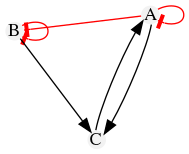

In [8]:
# impressão do IG
PyBoolNet.InteractionGraphs.create_image(primes, "exemplo_ig.png",LayoutEngine="sfdp")
Image("exemplo_ig.png")

created exemplo_stg.png


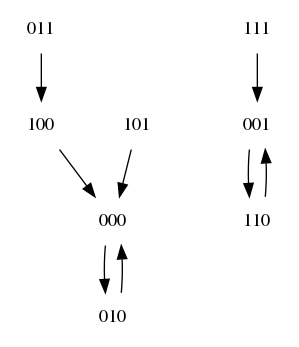

In [9]:
# impressão do STG
PyBoolNet.StateTransitionGraphs.create_image(primes, "synchronous", "exemplo_stg.png")
Image ("exemplo_stg.png")

### Insira aqui a BN proposta no artigo

In [ ]:
### insira aqui a sua rede booleana
%%writefile BN.txt


UsageError: %%writefile is a cell magic, but the cell body is empty.


In [ ]:
### código para encontrar os atratores

### Breve discussão dos resultados obtidos.


## Tarefa 2 
A partir dos dois atratores que resultaram do modelo no artigo podemos inferir TBNs que corresposdem às possíveis soluções para cada um dos genes. 

Calcule quantas matrizes do modelo TBN são soluções possíveis para essas transições de estados dos atratores. Discuta o resultado obtido. 

In [ ]:
# Crie um conjunto de dados contendo as transições existentes nos atratores 
# Cada estado deve ser representado como uma lista de inteiros
# Cada transição deve ser representada como uma lista com dois elementos, o estado atual e o estado sucessor
# Inferir a tbn com base nos atratores 


### Breve discussão dos resultados obtidos.

## Tarefa 3
1.   obtenha a tabela com todas as transições de estados do modelo do artigo ao invés de apenas 
os estados dos atratores;
2.   faça a inferência do modelo de TBNs; e
3.   discuta o resultado obtido.


In [ ]:
#Escreva aqui seu código


### Breve discussão dos resultados obtidos.

## Tarefa 4
Uma das estratégias para diminuir o espaço de busca seria selecionar as linhas com maior número de zeros, uma vez que poderíamos pensar que buscamos matrizes mais simples, ou seja, com menor número de arestas mantendo as transições de estado dos atratores


Filtrando pela maior quantidade de zeros em cada linha quantas matrizes são possíveis soluções? Verifique aleatoriamente algumas dessas matrizes. Os grafos de Regulação Gênica são conexos? Essas matrizes são coerentes para o problema proposto?

In [ ]:
""" Filtragem de soluções com o menor número de arestas
    - Linhas com maior quantidade zeros                 """
# Escreva aqui seu código


In [10]:
""" Imprima a quantidade de soluções - linhas possíveis para cada gene"""
# Escreva aqui seu código


' Imprima a quantidade de soluções - linhas possíveis para cada gene'

In [11]:
""" Obtenção de matriz aleatória """
# Escreva aqui seu código


' Obtenção de matriz aleatória '

### Discussão dos resultados obtidos.

## Tarefa 5 - (2 pontos)
Uma outra estratégia é acrescentar restrições para alguns genes de acordo com as dependências propostas no artigo, como por exemplo, para CycD que sinaliza a divisão celular deverá estar sempre ativado e não ser influenciado por nenhum dos demais genes analisados pois todos estão envolvidos no processo da divisão. Além disso, Rb é inibido por todas as ciclinas uma vez que eles se relacionam à fase de crescimento da célula. Tente com outras restrições e verifique se há mudança significativa no conjunto de soluções.

In [ ]:
# Nas soluções possíveis mantenha para CycD apenas a linha [1,  0,  0, 0, 0,  0,  0,  0,  0, 0]
# Nas soluções para Rb selecione as linhas em que as ciclinas tenham o valor -1
# Verifique a quantidade de matrizes possíveis
# Acrescente outras restrições para verificar se há mudança no conjunto de soluções
# Verifique também agora com a seleção de linhas com maior quantidade de zeros

# seu código aqui

### Comente os resultados obtidos após a observação de algumas matrizes aleatórias deste novo conjunto de possíveis soluções


## Tarefa 6
Faça uma análise das matrizes candidatas. Você pode utilizar códigos disponibilizados e também criar os seus.
Utilize quantas células com código que quiser

## Tarefa 7
Seleção de uma melhor candidata - descrever quais foram os critérios utilizados para se chegar a esta conclusão.

## Tarefa 8 - (2 pontos) - fazer um dos itens abaixo
* Crie outras formas de diminuir o espaço de busca para a viabilizar a análise das possíveis soluções indicando também o tempo de execução que foi necessário.
* Ou, caso você tenha recursos para realizar uma busca exaustiva descreva também os requisitos que foram necessários e o tempo de execução. Disponibilize seu código.
* Ou você pode criar um módulo de análise de redes BN e TBN melhorando os códigos disponibilizados em aula.